This is an open-source dataset created by the Teradata Center at Duke University. The Cell2Cell dataset is pre-processed and contains over 70,000 instances and 58 attributes. It can be used to understand subscriber churn. Some interesting questions to explore while solving this problem are:

Is the company losing high-value subscribers?
What different customer segmentations are possible? Which ones can help us analyze the churn problem?
How well are the retention policies implemented? What role does customer support play in minimizing churn?

In [110]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
import json
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
%matplotlib inline

In [146]:
# Read data
df = pd.read_csv(r'data/cell2celltrain.csv')

In [112]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [113]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [114]:
df.shape

(51047, 58)

# EDA

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

 #   Column                     Non-Null Count  Dtype     Description 
---  ------                     --------------  -----     --------
 0   CustomerID                 51047 non-null  int64     Unique ID of customer
 1   Churn                      51047 non-null  object    Target column which tells whether customer churned or not
 2   MonthlyRevenue             50891 non-null  float64   Monthly revenue of customer
 3   MonthlyMinutes             50891 non-null  float64   Monthly minutes used by customer
 4   TotalRecurringCharge       50891 non-null  float64   Total recurring charges on bill
 5   DirectorAssistedCalls      50891 non-null  float64   Number of operator-assisted long-distance telephone call
 6   OverageMinutes             50891 non-null  float64   Extra minutes used beyond the limit included in their calling plan.
 7   RoamingCalls               50891 non-null  float64   Duration of roaming calls
 8   PercChangeMinutes          50680 non-null  float64   Call usage (in min) changes wrt to previous period.((C-P)/P)*100. Indicate changes in usage behavior
 9   PercChangeRevenues         50680 non-null  float64   Customer’s billed revenue has changed compared to a previous period.((C-P)/P) * 100. Revenue trend
 10  DroppedCalls               51047 non-null  float64   Duration of calls dropped. High values - network or service issues; affects customer satisfaction
 11  BlockedCalls               51047 non-null  float64   Duration of calls that were blocked
 12  UnansweredCalls            51047 non-null  float64   Duration of calls attempted but not answered
 13  CustomerCareCalls          51047 non-null  float64   Duration of Customer Care calls
 14  ThreewayCalls              51047 non-null  float64   Duration of three way conference calls
 15  ReceivedCalls              51047 non-null  float64   Duration of received calls
 16  OutboundCalls              51047 non-null  float64   Duration of outbound calls. Measures customer-initiated activity
 17  InboundCalls               51047 non-null  float64   Duration of inbound calls
 18  PeakCallsInOut             51047 non-null  float64   Total number of calls (incoming + outgoing) during peak hours
 19  OffPeakCallsInOut          51047 non-null  float64   Total number of calls (incoming + outgoing) during off peak hours
 20  DroppedBlockedCalls        51047 non-null  float64   Total duration of calls that were either dropped or blocked.
 21  CallForwardingCalls        51047 non-null  float64   Number of calls forwarded to another number
 22  CallWaitingCalls           51047 non-null  float64   Number of calls using call waiting, Indicates use of advanced calling features
 23  MonthsInService            51047 non-null  int64     Number of months the customer has been with the service, longer tenure often reduces churn risk
 24  UniqueSubs                 51047 non-null  int64     Number of unique subscriptions held by customer
 25  ActiveSubs                 51047 non-null  int64     Number of active subscriptions, shows current service usage
 26  ServiceArea                51023 non-null  object    Geographical area of customer’s service. Could relate to network quality or coverage differences
 27  Handsets                   51046 non-null  float64   Number of handsets owned. Customer equipment usage; may relate to upgrades or churn risk
 28  HandsetModels              51046 non-null  float64   Number of different handset models customer owns
 29  CurrentEquipmentDays       51046 non-null  float64   Days since the current handset was activated. Age of handset; older devices may correlate with churn
 30  AgeHH1                     50138 non-null  float64   Age of primary household member. Demographic information
 31  AgeHH2                     50138 non-null  float64   Age of secondary household member. Demographic information
 32  ChildrenInHH               51047 non-null  object    Indicator of children in household
 33  HandsetRefurbished         51047 non-null  object    Whether the handset is refurbished
 34  HandsetWebCapable          51047 non-null  object    Whether the handset can access the web
 35  TruckOwner                 51047 non-null  object    Whether the customer owns a truck. Lifestyle indicator
 36  RVOwner                    51047 non-null  object    Whether the customer owns a recreational vehicle. Lifestyle indicator
 37  Homeownership              51047 non-null  object    Own vs. rent
 38  BuysViaMailOrder           51047 non-null  object    Whether the customer buys via mail
 39  RespondsToMailOffers       51047 non-null  object    Whether customer responds to mail offers
 40  OptOutMailings             51047 non-null  object    Whether customer opted out of mailings
 41  NonUSTravel                51047 non-null  object    Whether customer travels outside US
 42  OwnsComputer               51047 non-null  object    Whether the customer owns a computer
 43  HasCreditCard              51047 non-null  object    Whether the customer has a credit card
 44  RetentionCalls             51047 non-null  int64     Number of calls from retention team
 45  RetentionOffersAccepted    51047 non-null  int64     Number of retention offers accepted
 46  NewCellphoneUser           51047 non-null  object    Whether the customer is a new cellphone user
 47  NotNewCellphoneUser        51047 non-null  object    Complement of above
 48  ReferralsMadeBySubscriber  51047 non-null  int64     Number of referrals made, Loyalty indicator; customer advocacy
 49  IncomeGroup                51047 non-null  int64     Income bracket / group of customer, socio economic indicator
 50  OwnsMotorcycle             51047 non-null  object    Whether customer owns a motorcycle,Lifestyle / demographic indicator
 51  AdjustmentsToCreditRating  51047 non-null  int64     Number of credit rating adjustments, Financial history; risk indicator
 52  HandsetPrice               51047 non-null  object    Price of handset, socio economic indicator
 53  MadeCallToRetentionTeam    51047 non-null  object    Whether customer called retention team, Engagement / churn indicator
 54  CreditRating               51047 non-null  object    Credit rating category, Financial profile of customer
 55  PrizmCode                  51047 non-null  object    PRIZM segmentation code, marketing or lifestyle segmentation
 56  Occupation                 51047 non-null  object    Occupation category, demographic segmentation
 57  MaritalStatus              51047 non-null  object    Marital status, demgraphic segmentation

In [ ]:
# Remove Customer ID
df.drop(columns='CustomerID', axis = 1, inplace=True)

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
a = df.describe()

In [ ]:
a = dict(a.iloc[1, :])

In [ ]:
# Get the average values of all the columns to understand them better
a

# Missing Data Analysis

In [ ]:
# Check for missing values
df.isnull().sum()

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() >0:
        print(f'{col:<25} contains missing values - {df[col].isnull().sum():5}, type - {df[col].dtype}')

# Unique Count

In [ ]:
for col in df.columns:
    print(f'{col:<25} has {df[col].nunique():>10} values ')

In [ ]:
print('Columns with less than or equal to 10 unique values')
for col in df.columns:
    if df[col].nunique()<=10:
        print(f'{col:<25} has {df[col].nunique():>10} values ')
print('***************************************')
print('***************************************')
print('Columns with more than 10 unique values')
for col in df.columns:
    if df[col].nunique()>10:
        print(f'{col:<25} has {df[col].nunique():>10} values')

In [ ]:
print('Columns with less than or equal to 10 unique values')
cat = []
num = []
for col in df.columns:
    if df[col].nunique()<=10:
        cat.append(col)
print('***************************************')
print('***************************************')
print('Columns with more than 10 unique values')
for col in df.columns:
    if df[col].nunique()>10:
        num.append(col)

print(cat)
print('-----')
print(num)

# Duplicate values check

In [ ]:
df.duplicated().sum()

No duplicates are present

# Categorise data into numerical and categorical type for analysis
- If a columns has 10 or less unique values then it is categorical.
- If a column has more than 10 unique values then it is numerical however some columns like ServiceArea although have more than 10 unique values, will be considered as categorical. 


In [219]:
categorical_features = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea' ]

categorical_features_without_servicearea = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus' ]

numerical_features = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating', 'HandsetPrice', 'HandsetModels']

target = ['Churn']


In [147]:
# HandsetPrice, which I have considered as a numerical column has some data which is  "unknown". Will need to convert this into NA for univariate analysis
df['HandsetPrice'] = pd.to_numeric(df['HandsetPrice'], errors ='coerce')

In [148]:
df['HandsetPrice'].dtype

dtype('float64')

# Numerical features univariate analysis

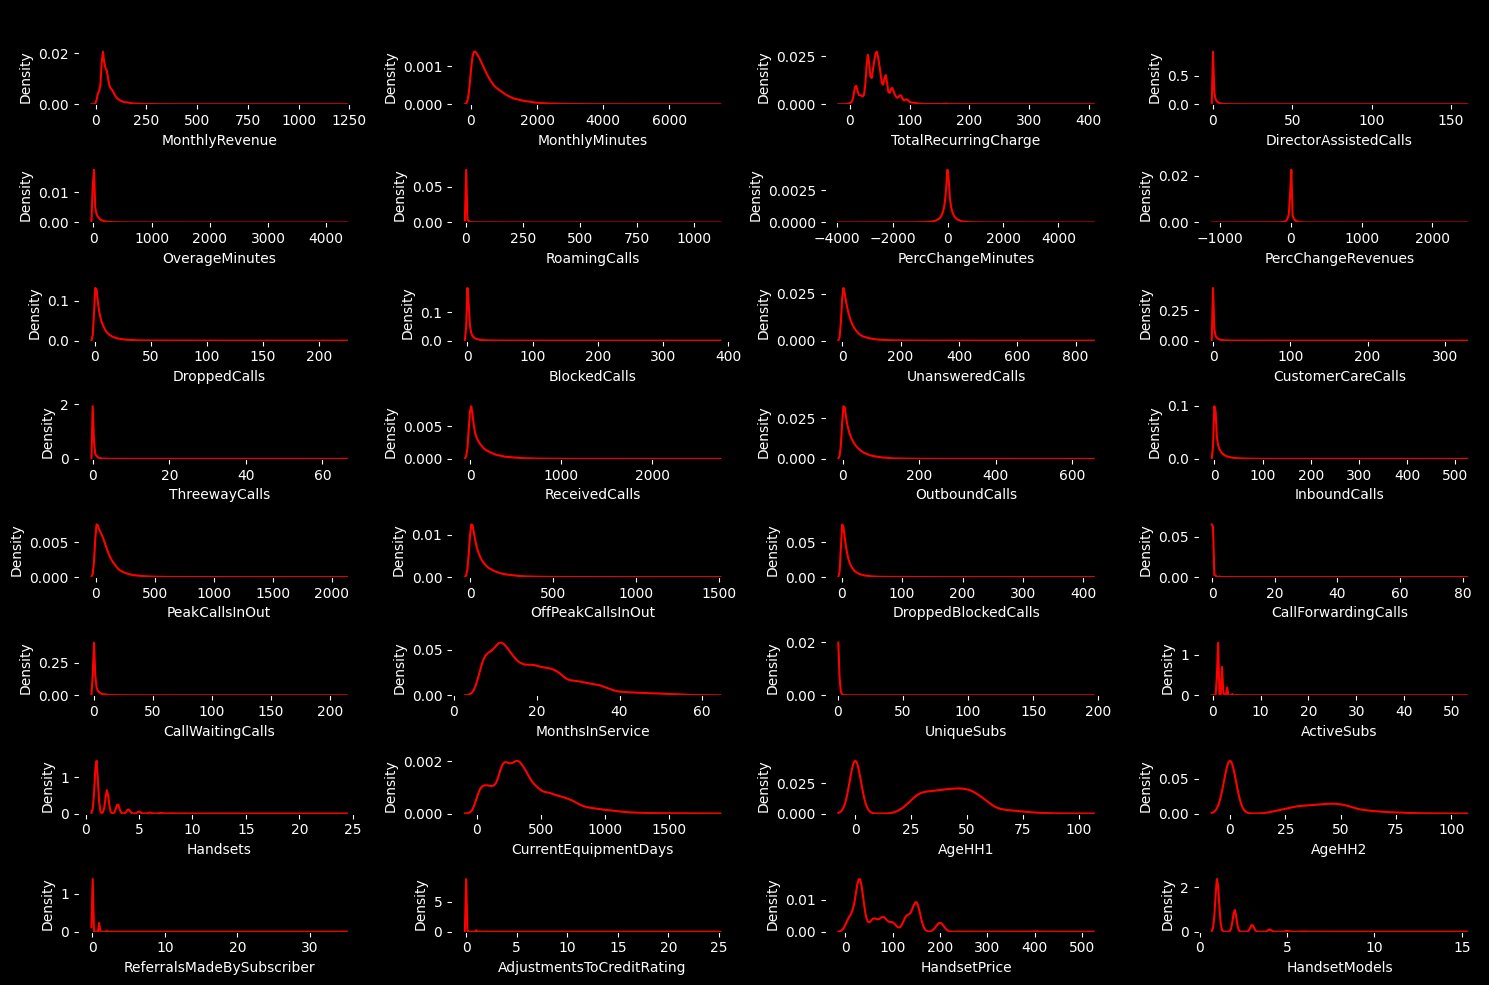

In [139]:
plt.figure(figsize = (15, 10), facecolor = 'black')
plt.suptitle('Univariate analysis of numerical features', fontsize = 20, fontweight = 'bold')
for i in range(len(numerical_features)):
    ax = plt.subplot(8, 4, i + 1)
    sns.kdeplot(data = df[numerical_features[i]], color='red')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    ax.set_facecolor('black')

    # Change the color of labels and tick marks
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis = 'x', colors = 'white')
    ax.tick_params(axis = 'y', colors = 'white')

# Obervations from univariate analysis of numerical columns
PercChangeMinutes is the only column that is normally distributed. Rest of them are left skewed. 

# Categorical features univariate analysis

In [ ]:
colors_24 = sns.color_palette("tab20", 20) + sns.color_palette("Set3", 4)
colors_24

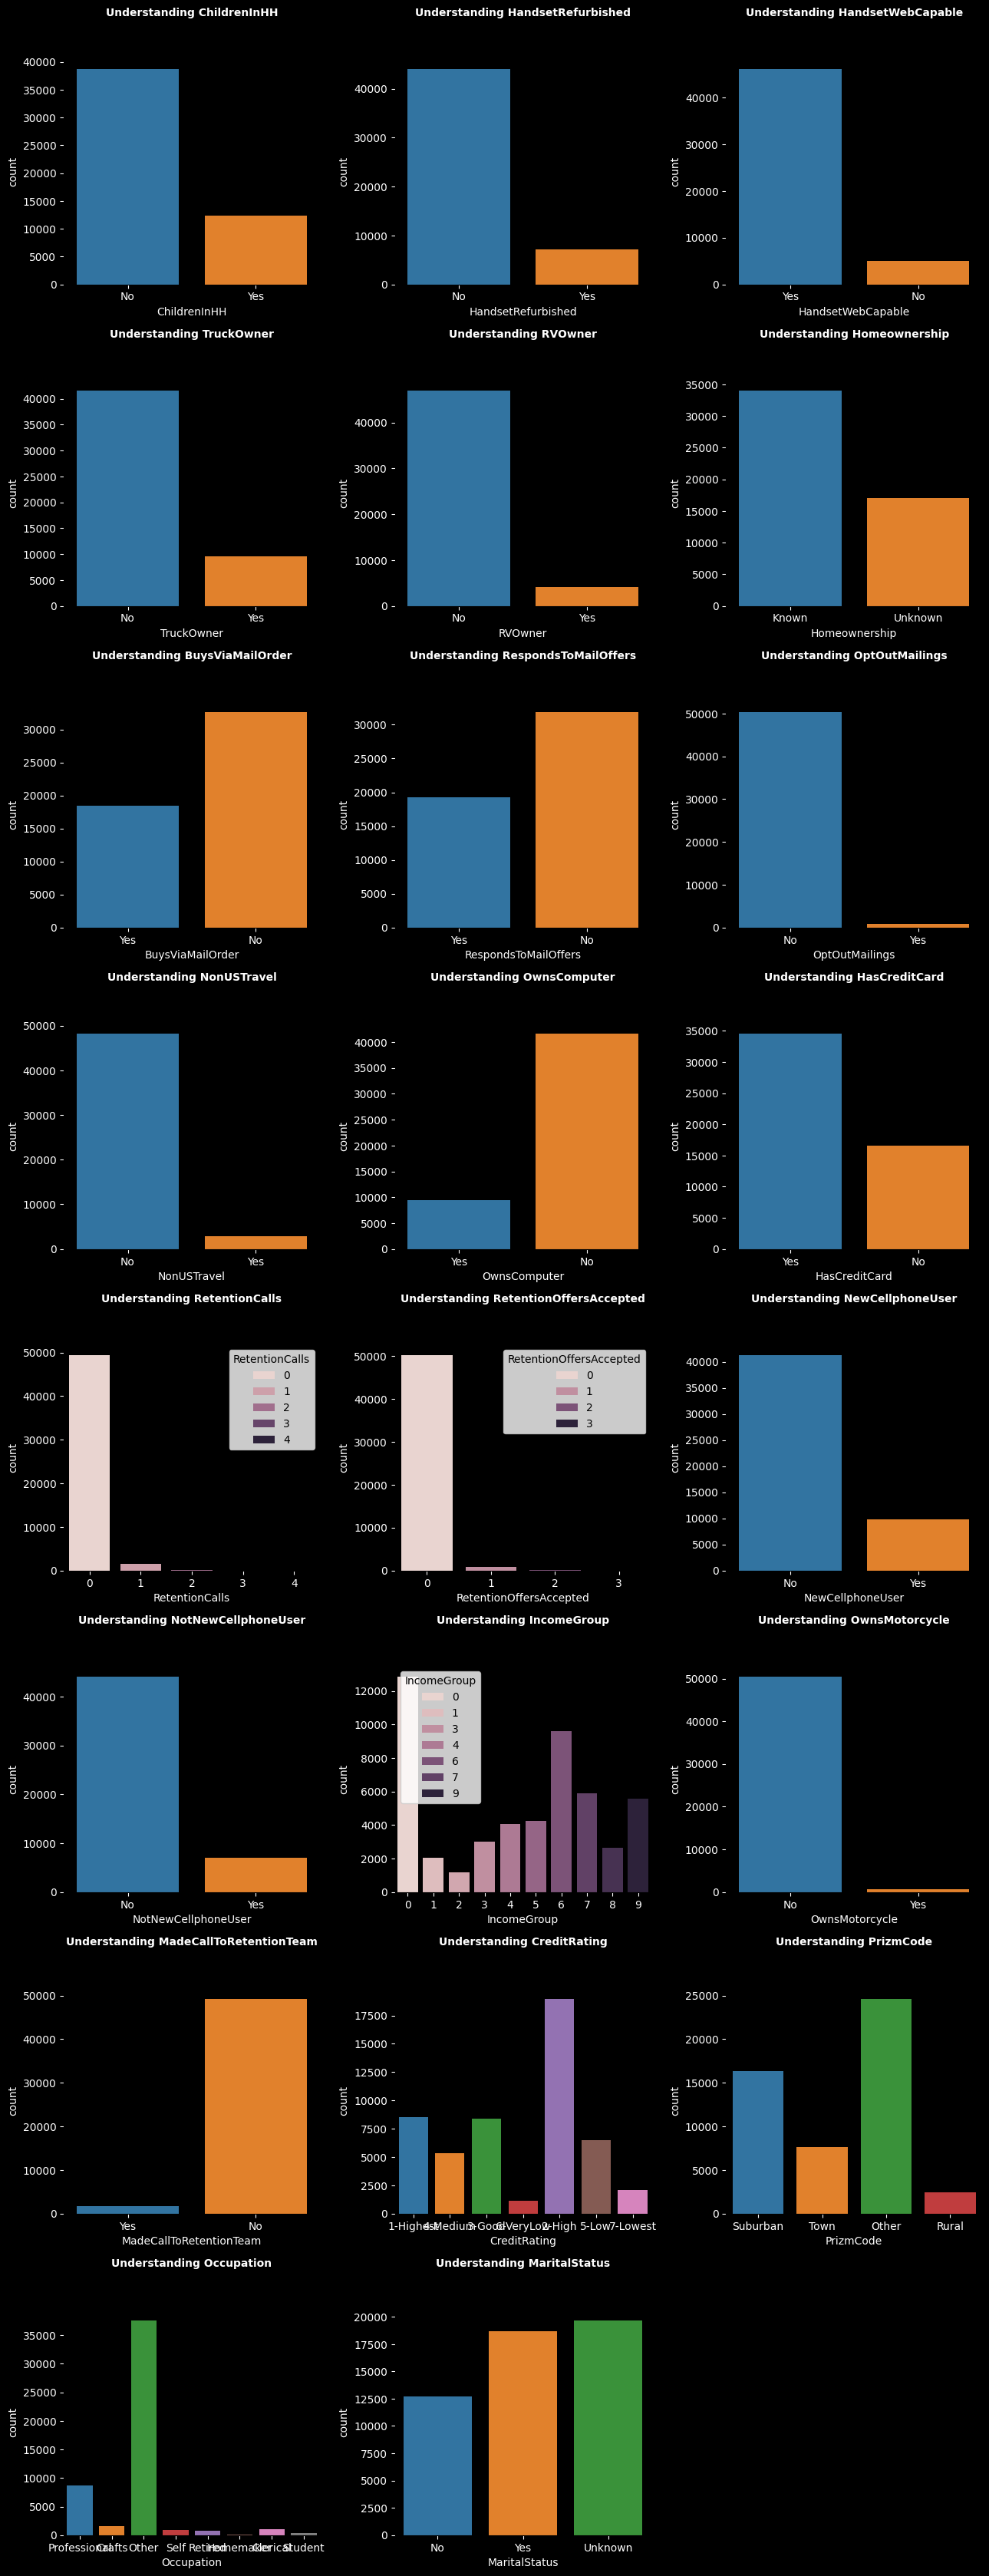

In [220]:
plt.figure(figsize=(13, 50), facecolor='black')


for i in range(len(categorical_features_without_servicearea)):
    ax = plt.subplot(12, 3, i+1)
    sns.countplot(data = df, x = categorical_features_without_servicearea[i], hue = categorical_features_without_servicearea[i], )
    plt.xlabel(categorical_features[i], color = 'white')
    ax.set_facecolor('black')
    plt.title(f'Understanding {categorical_features_without_servicearea[i]}', color = 'white', fontsize = 10, fontweight = 'bold', pad = 40)

    # change the color of labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis = 'x', colors = 'white')
    ax.tick_params(axis = 'y', colors = 'white')

plt.tight_layout()
plt.show()

# Relationship between categorical variable and target (Bivariate analysis)

# Relationship between ChildrenINHH and Churn

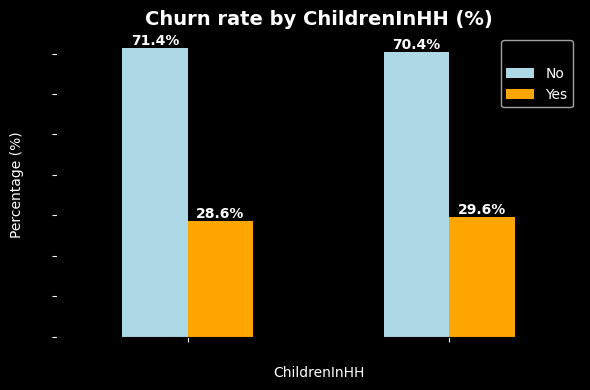

In [178]:
pct_data = pd.crosstab(df['ChildrenInHH'], df['Churn'], normalize = 'index') * 100

fig, ax = plt.subplots(figsize = (6, 4), facecolor = 'black')
plt.title('Relationship between ChildrenInHH and Churn', color = 'white', fontsize = 12, fontweight = 'bold', pad = 40)
pct_data.plot(kind = 'bar', ax = ax, color = ['lightblue', 'orange'])
ax.set_title('Churn rate by ChildrenInHH (%)', color = 'white', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('ChildrenInHH', color = 'white')
ax.set_ylabel('Percentage (%)', color = 'white')
ax.set_facecolor('black')

ax.tick_params(axis = 'x', color = 'white', rotation = 0)
ax.tick_params(axis = 'y', color = 'white')
ax.legend(title = 'Churn', facecolor = 'black', labelcolor = 'white')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%', color = 'white', fontweight = 'bold')

plt.tight_layout()
plt.show()


Observation: Churn rate for household with and without children are approximately same (around 29%). However, since households without children makeup majority of the customer base, the absolute number of churners is higher in that group. 

# Relationship between HandsetRefurbished and Churn

# Multicollinearity check - THIS NEEDS TO BE PERFORMED LATER AS OUR DATA CONTAINS NAN VALUES

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF_Value'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

calculate_vif(df.loc[:, numerical_features])

MissingDataError: exog contains inf or nans

# Convert datatypes from object to int/float to feed data into model

In [ ]:
# List of categorical features
object_features = [col for col in df.columns if df[col].dtype == 'object']
print(object_features)

In [ ]:
def convert_object_data_into_int_float(df, smoothing_factor=10, handle_na = True):
    # handle_na is used for treating missing values as separate category in ServiceArea. 
    # If handle_na is True then the NAN values in ServiceArea will be treated as a separate category otherwise these values will be replaced by global mean. 

    binary_mappings = {
        'Churn': {'No':0, 'Yes': 1},
        'ChildrenInHH': {'No':0, 'Yes':1},
        'HandsetRefurbished': {'No':0, 'Yes':1},
        'HandsetWebCapable': {'No':0, 'Yes': 1},
        'TruckOwner': {'No': 0, 'Yes':1},
        'RVOwner': {'No':0, 'Yes': 1},
        'Homeownership': {'Unknown': 0, 'Known':1},
        'BuysViaMailOrder': {'No':0, 'Yes':1},
        'RespondsToMailOffers': {'No':0, 'Yes':1},
        'OptOutMailings': {'No':0, 'Yes':1},
        'NonUSTravel': {'No':0, 'Yes':1},
        'OwnsComputer': {'No':0, 'Yes': 1},
        'HasCreditCard': {'No': 0, 'Yes': 1},
        'NewCellphoneUser': {'No':0, 'Yes':1},
        'NotNewCellphoneUser': {'No':0, 'Yes':1},
        'OwnsMotorcycle': {'No':0, 'Yes':1},
        'MadeCallToRetentionTeam': {'No': 0, 'Yes':1}
    }
    # Apply binary mappings
    for col, mapping in binary_mappings.items():
        # col = col + '_num'
        df[col] = df[col].map(mapping)
    
    # for multi category columns, we are going to use pandas get_dummies. 
    multi_category_columns = ['CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']
    # Creating a separate dataframe where I am storing all these dummies that are created. Then I am concatenating this with original df to keep the original column too.
    dummies = pd.get_dummies(df[multi_category_columns], drop_first=True)
    df_with_dummies = pd.concat([df, dummies], axis = 1)
    df_with_dummies.drop(multi_category_columns, axis=1, inplace=True)
    # Now ServiceArea has more than 20 categories, for this I am using target encoding with cross validation
    # Create a separate column where we will store the target encoding for Service Area column
    df_with_dummies['ServiceArea_te'] = np.nan

    if handle_na == True:
        df_with_dummies['ServiceArea'] = df_with_dummies['ServiceArea'].fillna('Missing')

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    m = smoothing_factor # Smoothing factor
    global_mean = df_with_dummies['Churn'].mean()

    for train_idx, val_idx in kf.split(df_with_dummies):
        train_fold = df_with_dummies.iloc[train_idx]
        ## val_fold = df_with_dummies.iloc[val_idx]

        # Compute mean and count for target for each category in training fold
        stats = train_fold.groupby('ServiceArea')['Churn'].agg(['mean', 'count'])
        
        # apply smoothing
        stats['smoothed'] = ((stats['count'] * stats['mean'] + m * global_mean))/ (stats['count'] + m)

        # Map smoothed values to validation set
        df_with_dummies.loc[val_idx, 'ServiceArea_te'] = df_with_dummies.loc[val_idx, 'ServiceArea'].map(stats['smoothed'])
    
    # Fill unseen categories with global mean
    df_with_dummies['ServiceArea_te'] = df_with_dummies['ServiceArea_te'].fillna(global_mean)
    # Store the final results in json file for use in inference

    stats = df_with_dummies.groupby('ServiceArea')['Churn'].agg(['mean', 'count'])
    stats['TE'] = ((stats['mean'] * stats['count']) + (global_mean * smoothing_factor)) / (stats['count'] + smoothing_factor)
    final_encoding = stats['TE'].to_dict()
    with open('service_area_encoding.json', 'w') as f:
        json.dump(final_encoding, f)
    df_with_dummies.drop(['ServiceArea'], axis = 1, inplace=True)
    # HandsetPrice is also a column with object datatype but that is because of the presence of missing values. When we handle these missing values then the column would automatically become numerical type.
    return df_with_dummies

    



In [ ]:
# Now we just call the above function to convert object datatype columns into numerical datatype columns
df_numerical= convert_object_data_into_int_float(df)

In [ ]:
df_numerical.shape

In [ ]:
df_numerical.info()

# Handle missing values

In [ ]:
# Hanlding missing value in MonthlyRevenue
# Using KNN imputation. 
# Reason to use KNN imputation is because the missingness of data can be explained by other features in the dataset. 
# Target - MonthlyRevenue
# Independent features - Monthlyminutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls, PercChangeMinutes, PeakCallsInOut, OffPeakCallsInOut, ServiceArea, Homeownership, RetentionCalls, RetentionOffersAccepted, IncomeGroup

# Notes

1. CustomerID does not add any value in prediction. Removing it
2. Converting object data type into numerical data type. This is needed as we cannot give string data to model. For columns with only two categories, I have simply mapped the categories to 0 and 1. for columns with more than 5 but less than 10 categories, I have used one hot encoding using pandas get dummies. We cannot just assign values like 1, 2, 3 , 4 etc to these as then the model will treat this like a ordinal data when in fact it is not. Model might try to get some relation between these values when in fact it does not exist. Therefore we need to use one hot encoding. 
For column like service area with 100s of unique values there is a choice either we can use Frequency encoding or target encoding. Each has their own advantage and disadvantage. 
Frequency encoding - Replaces each category with its relative frequency in the dataset.
Pros:
 - Simple and safe (no risk of leakage).
- Works with any model (tree-based, linear, deep learning).
- Keeps dataset compact.
Cons:
- Doesn’t capture the relationship between category and churn.
- Two service areas with same frequency but very different churn rates will look identical.

Target encoding - Replaces each category with the average target value (churn probability) for that category.
Pros:
- Very powerful — directly encodes predictive information.
- Often improves performance, especially with high-cardinality features.
Cons:
- Data leakage risk if not done carefully → must apply encoding inside cross-validation folds.
- Can overfit if a category has very few samples.

Smoothed target encoding formula
For each category c,
Target encoding (C) = ((nc * mean(c)) + (m * global_mean))/(nc + m)
mean(c) = average churn in category c
nc = number of samples in category c
global_mean = overall churn rate
m  = smoothing factor (higher = more weight on global mean)

I am going to be using target encoding and in that I am also using cross validation to avoid data leakage. 

Readme
Target columns is Churn
Perform EDA - Understand all the columns and meaning of data represented by each column
Convert all object data type columns to numerical form

In [ ]:
df_test = df.copy()

In [ ]:
df_test = pd.get_dummies(df_test, columns = ['CreditRating'], drop_first=True)

In [ ]:
df_test.columns

In [ ]:
df_test.head()